for a box-constrained problem, to help you start this task. This algorithm will be for continuous box-constrained optimisation, when the uncertainty set is infinite, and U defines a box centred around a design x, whose sides are corners are (±ϵ, . . . , ±ϵ). The robust performance of a design is then estimated
based on k Monte Carlo samples from U, creating U˜.

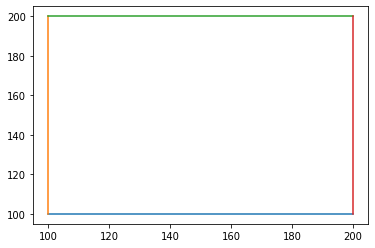

In [1]:
# Creating a box constrained decision space (100,100) ,(200,100) , (100,200) , (200,200)
import matplotlib.pyplot as plt
plt.plot([100,200],[100,100])
plt.plot([100,100],[100,200])
plt.plot([100,200],[200,200])
plt.plot([200,200],[200,100])

In [2]:
# creating a box centered around design x of size 2 
import numpy as np
x = np.random.randint(100,200,1)
y = np.random.randint(100,200,1)
decision_vector = [x,y]
x_1 = np.random.randint(100,200,1)
y_1 = np.random.randint(100,200,1)
decision_vector_1 = [x_1,y_1]

In [4]:
# creating a sample of U
u=[]
for i in range(0,100):
    x = np.random.randint(-10,10,1)
    y = np.random.randint(-10,10,1)
    u.append([x,y])
u

[[array([-3]), array([8])],
 [array([8]), array([-8])],
 [array([8]), array([2])],
 [array([-6]), array([2])],
 [array([5]), array([6])],
 [array([9]), array([-2])],
 [array([-8]), array([4])],
 [array([2]), array([3])],
 [array([5]), array([-2])],
 [array([-1]), array([7])],
 [array([-7]), array([5])],
 [array([-5]), array([8])],
 [array([-5]), array([-7])],
 [array([-1]), array([7])],
 [array([6]), array([-5])],
 [array([8]), array([8])],
 [array([-10]), array([3])],
 [array([6]), array([-4])],
 [array([-8]), array([0])],
 [array([1]), array([1])],
 [array([1]), array([-7])],
 [array([3]), array([-8])],
 [array([-9]), array([0])],
 [array([7]), array([-3])],
 [array([7]), array([-3])],
 [array([-2]), array([8])],
 [array([2]), array([2])],
 [array([1]), array([-3])],
 [array([-7]), array([-7])],
 [array([1]), array([2])],
 [array([6]), array([7])],
 [array([9]), array([0])],
 [array([2]), array([7])],
 [array([-3]), array([-10])],
 [array([-5]), array([0])],
 [array([1]), array([3])]

In [5]:
# sampling from u
mean = np.mean(u)
std = np.std(u)
indexes = []
for i in range(0,6):
    indexes.append(np.random.randint(0,len(u)))
U = [u[i] for i in indexes]
U

[[array([-8]), array([0])],
 [array([-3]), array([-4])],
 [array([8]), array([-9])],
 [array([-1]), array([2])],
 [array([-5]), array([3])],
 [array([1]), array([7])]]

In [24]:
decision_vector

[array([126]), array([188])]

In [25]:
pertubations = []
pertubations_2 = []
for i in range(0,len(U)):
    pertubations.append([decision_vector[0]-U[i][0],decision_vector[0]-U[i][1]])
    pertubations_2.append([decision_vector_1[0]-U[i][0],decision_vector_1[0]-U[i][1]])

In [26]:
pertubations

[[array([122]), array([133])],
 [array([119]), array([126])],
 [array([129]), array([128])],
 [array([120]), array([129])],
 [array([130]), array([122])],
 [array([125]), array([124])]]

In [27]:
pertubations_2

[[array([149]), array([160])],
 [array([146]), array([153])],
 [array([156]), array([155])],
 [array([147]), array([156])],
 [array([157]), array([149])],
 [array([152]), array([151])]]

In [28]:
# Generating objective function
objective_vectors = []
objective_vectors_2 = []
for i in range(0,len(pertubations)):
    objective_vectors.append([pertubations[i][0]**2 + pertubations[i][1]**3,pertubations[i][1]**2 - 4*pertubations[i][1]] )
    objective_vectors_2.append([pertubations_2[i][0]**2 + pertubations_2[i][1]**3,pertubations_2[i][1]**2 - 4*pertubations_2[i][1]] )

In [29]:
objective_vectors

[[array([2367521]), array([17157])],
 [array([2014537]), array([15372])],
 [array([2113793]), array([15872])],
 [array([2161089]), array([16125])],
 [array([1832748]), array([14396])],
 [array([1922249]), array([14880])]]

In [21]:
def dominates_Flag(A,B):
    flag = False
    count = 0 
    for i in range(0,len(A)):
        if(A[i]<B[i]):
            flag = True
            count = count +1
        elif(A[i]==B[i]):
            flag = True
        else:
            flag = False
            break
    if(flag == True and count >= 1):
        return True
    else:
        return False


In [22]:
def flimsily_robust(objective_vectors,objective_vectors_2):
    count = 0
    for i in range(0,len(objective_vectors)):
        if(dominates_Flag(objective_vectors[i],objective_vectors_2[i])):
            count = count + 1
    if(count>1):
        return True
    else:
        return False

In [33]:
flimsily_robust(objective_vectors,objective_vectors_2)

True

In [2]:
def highly_robust(objective_vectors,objective_vectors_2):
    count = 0
    for i in range(0,len(objective_vectors)):
        if(dominates_Flag(objective_vectors[i],objective_vectors_2[i])):
            count = count + 1
    if(count==len(objective_vectos)):
        return True
    else:
        return False

In [3]:
def point_based_minmax_robust(objective_vectors,objective_vectors_2):
    objective_vectors_x = []
    objective_vectors_y = []
    objective_vectors_2_x = []
    objective_vectors_2_y = []
    for i in objective_vectors:
        objective_vectors_x.append(i[0])
        objective_vectors_y.append(i[1])
    for j in objective_vectors_2:
        objective_vectors_2_x.append(j[0])
        objective_vectors_2_y.append(j[1])
    max_vec1 = [max(objective_vectors_x),max(objective_vectors_y)]
    max_vec2 = [max(objective_vectors_2_x),max(objective_vectors_2_y)]
    if(dominates_Flag(max_vec1,max_vec2)==True):
        return True
    else:
        return False

In [4]:
import statistics
def expected_performace_robust(objective_vectors,objective_vectors_2):
    objective_vectors_x = []
    objective_vectors_y = []
    objective_vectors_2_x = []
    objective_vectors_2_y = []
    for i in objective_vectors:
        objective_vectors_x.append(i[0])
        objective_vectors_y.append(i[1])
    for j in objective_vectors_2:
        objective_vectors_2_x.append(j[0])
        objective_vectors_2_y.append(j[1])
    mean_vec1 = [statistics.mean(objective_vectors_x),statistics.mean(objective_vectors_y)]
    mean_vec2 = [statistics.mean(objective_vectors_2_x),statistics.mean(objective_vectors_2_y)]
    if(dominates_Flag(mean_vec1,mean_vec2)==True):
        return True
    else:
        return False

In [7]:
!pip install platypus-opt

You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#### Workshop Part 2 . Problem Statement is ZDT2

In [31]:
def create_random_vector():
    x = np.random.randint(100,200,1)
    y = np.random.randint(100,200,1)
    decision_vector = [x,y]
    x_1 = np.random.randint(100,200,1)
    y_1 = np.random.randint(100,200,1)
    decision_vector_1 = [x_1,y_1]
    return decision_vector_1


def create_robust_noise():
    u=[]
    for i in range(0,100):
        x = np.random.randint(-10,10,1)
        y = np.random.randint(-10,10,1)
        u.append([x,y])
    return u

def sampling_from_u(u):
    indexes = []
    for i in range(0,6):
        indexes.append(np.random.randint(0,len(u)))
    U = [u[i] for i in indexes]
    return U


def create_pertubations(U,decision_vector):
    pertubations = []
    for i in range(0,len(U)):
        pertubations.append([decision_vector[0]+U[i][0],decision_vector[0]+U[i][1]])
    return pertubations

def evaluate_objective(pertubations):
    objective_vectors = []
    for i in range(0,len(pertubations)):
        objective_vectors.append([pertubations[i][0]**2 + pertubations[i][1]**3,pertubations[i][1]**2 - 4*pertubations[i][1]] )
    return objective_vectors

def mutate_parent(x):
    y=[]
    for i in range(0,len(x)):
        z = np.random.randint(-5,5)
        a=x[i][0]+z
        b=x[i][1]+z
        y.append([a,b])
    return y

def dominates_Flag(A,B):
    flag = False
    count = 0 
    for i in range(0,len(A)):
        if(A[i]<B[i]):
            flag = True
            count = count +1
        elif(A[i]==B[i]):
            flag = True
        else:
            flag = False
            break
    if(flag == True and count >= 1):
        return True
    else:
        return False


def flimsily_robust(objective_vectors,objective_vectors_2):
    count = 0
    for i in range(0,len(objective_vectors)):
        #print(objective_vectors[i])
        if(dominates_Flag(objective_vectors[i],objective_vectors_2[i])):
            count = count + 1
    if(count>1):
        return True
    else:
        return False
    


def PAES_inspired_optimizer():
    Archive = []
    x_unpertubed = create_random_vector()
    U = sampling_from_u(create_robust_noise())
    x = create_pertubations(U,x_unpertubed)
    Y_parent = evaluate_objective(x)
    Archive.append(Y_parent)
    z=1
    while(z<100):
        x_child = mutate_parent(x)
        Y_child = evaluate_objective(x_child)
        count = 0
        index = []
        for i in range(0,len(Archive)):
            if(flimsily_robust(Y_child,Archive[i])==True):
                count = count+1
                index.append(i)
        if(count == len(Archive)):
            x=x_child
            Y_parent = Y_child
            for i in index:
                Archive.pop(i)
            Archive.append(Y_child)
        print('iteration {0} completed'.format(z))
        z=z+1
    print('After {0} iterations final Archive is {1}'.format(z,Archive))
        

In [32]:
print(PAES_inspired_optimizer())

iteration 1 completed
iteration 2 completed
iteration 3 completed
iteration 4 completed
iteration 5 completed
iteration 6 completed
iteration 7 completed
iteration 8 completed
iteration 9 completed
iteration 10 completed
iteration 11 completed
iteration 12 completed
iteration 13 completed
iteration 14 completed
iteration 15 completed
iteration 16 completed
iteration 17 completed
iteration 18 completed
iteration 19 completed
iteration 20 completed
iteration 21 completed
iteration 22 completed
iteration 23 completed
iteration 24 completed
iteration 25 completed
iteration 26 completed
iteration 27 completed
iteration 28 completed
iteration 29 completed
iteration 30 completed
iteration 31 completed
iteration 32 completed
iteration 33 completed
iteration 34 completed
iteration 35 completed
iteration 36 completed
iteration 37 completed
iteration 38 completed
iteration 39 completed
iteration 40 completed
iteration 41 completed
iteration 42 completed
iteration 43 completed
iteration 44 complet